# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО: Джабраилов Виталий Дмитриевич

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [2]:
import warnings
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [4]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [5]:
np.array(mnist.data.iloc[0]).reshape((28,28))#вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [6]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [7]:
from sklearn.model_selection import train_test_split #имя требуемой функции здесь

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42)#деление выборки

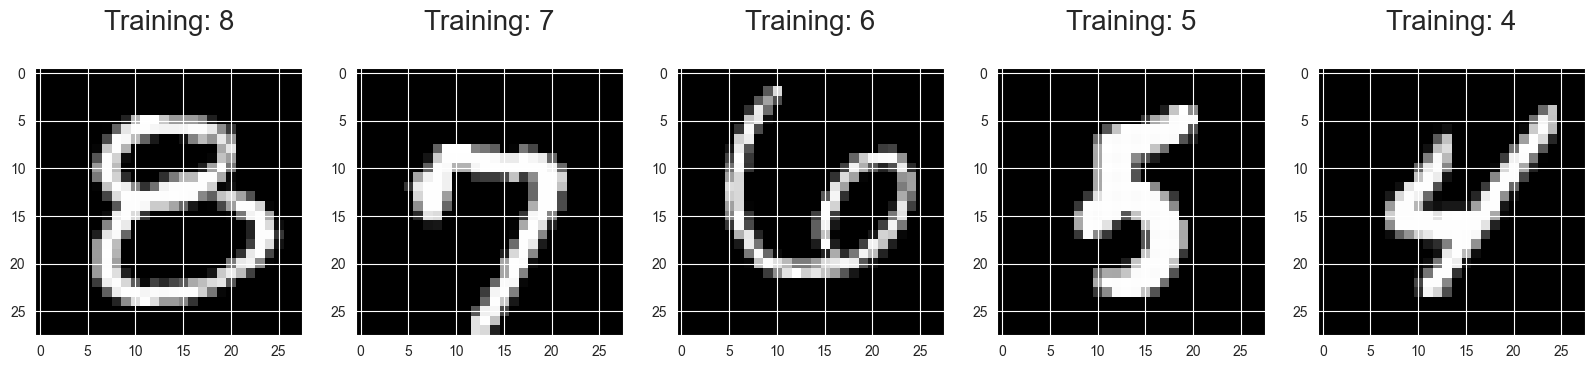

In [8]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.array(X_train[0:5].iloc[index]).reshape(28, 28), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso

In [10]:
%%time
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
predicted_logistic = lr.predict(X_test)

ridge = Ridge()
ridge.fit(X_train, y_train)
predicted_ridge = ridge.predict(X_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
predicted_lasso = lasso.predict(X_test)

CPU times: total: 2min 55s
Wall time: 41.7 s


**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

**kNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_grid = [1, 2, 3, 4, 5, 6, 7, 8, 9]
k_loss = dict()

for k in k_grid:
    knr = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    pred = knr.predict(X_test)

    k_loss[k] = accuracy_score(y_test, pred)

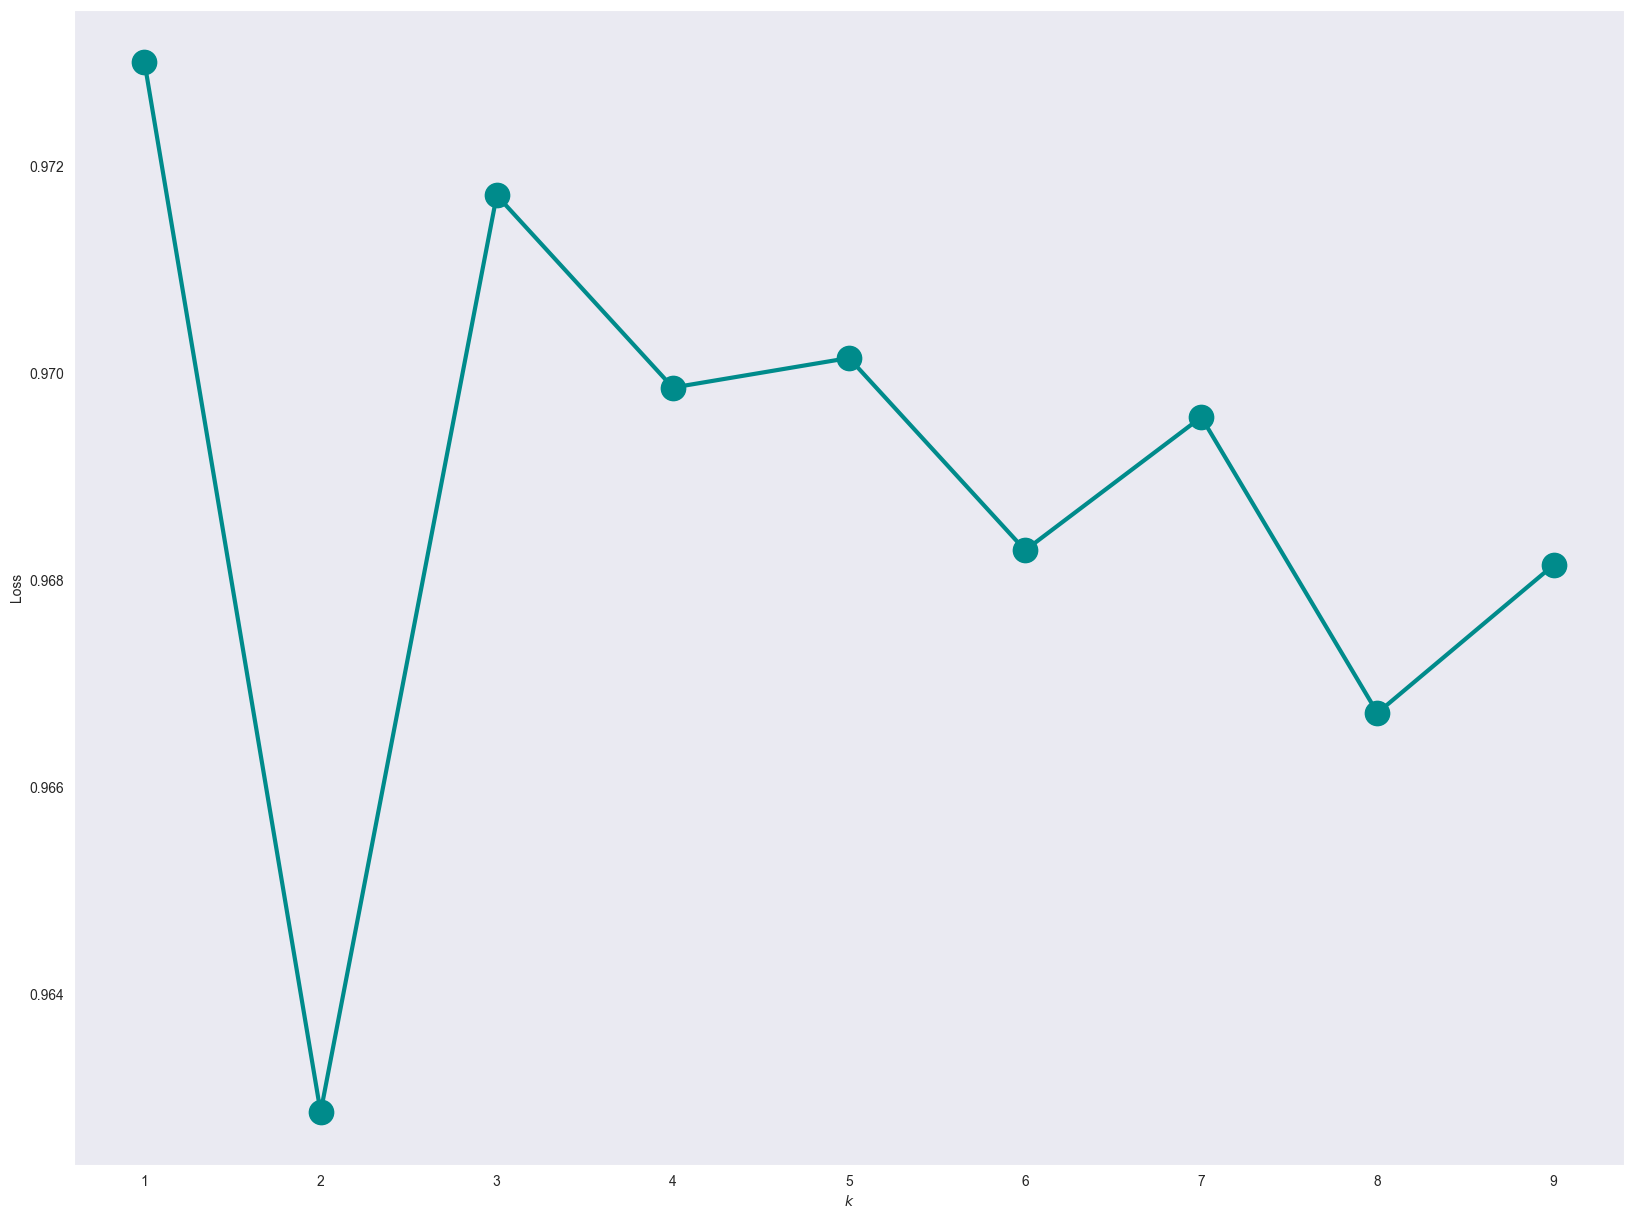

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

_x = list(k_loss.keys())
_y = list(k_loss.values())

plt.plot(
    _x, _y,
    linewidth=3, marker='.', markersize=35,
    color='darkcyan'
)

plt.xlabel(r'$k$')
plt.ylabel('Loss')

plt.grid()
plt.show()


Лучшей точностью обладает n = 3.

In [13]:
model_knr = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = model_knr.predict(X_test)

**Случайный лес**

In [16]:
from sklearn.ensemble import RandomForestClassifier

depth = np.arange(5, 30)
depth_loss = dict()

for k in depth:
    knr = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=42).fit(X_train, y_train)
    pred = knr.predict(X_test)

    depth_loss[k] = accuracy_score(y_test, pred)

5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

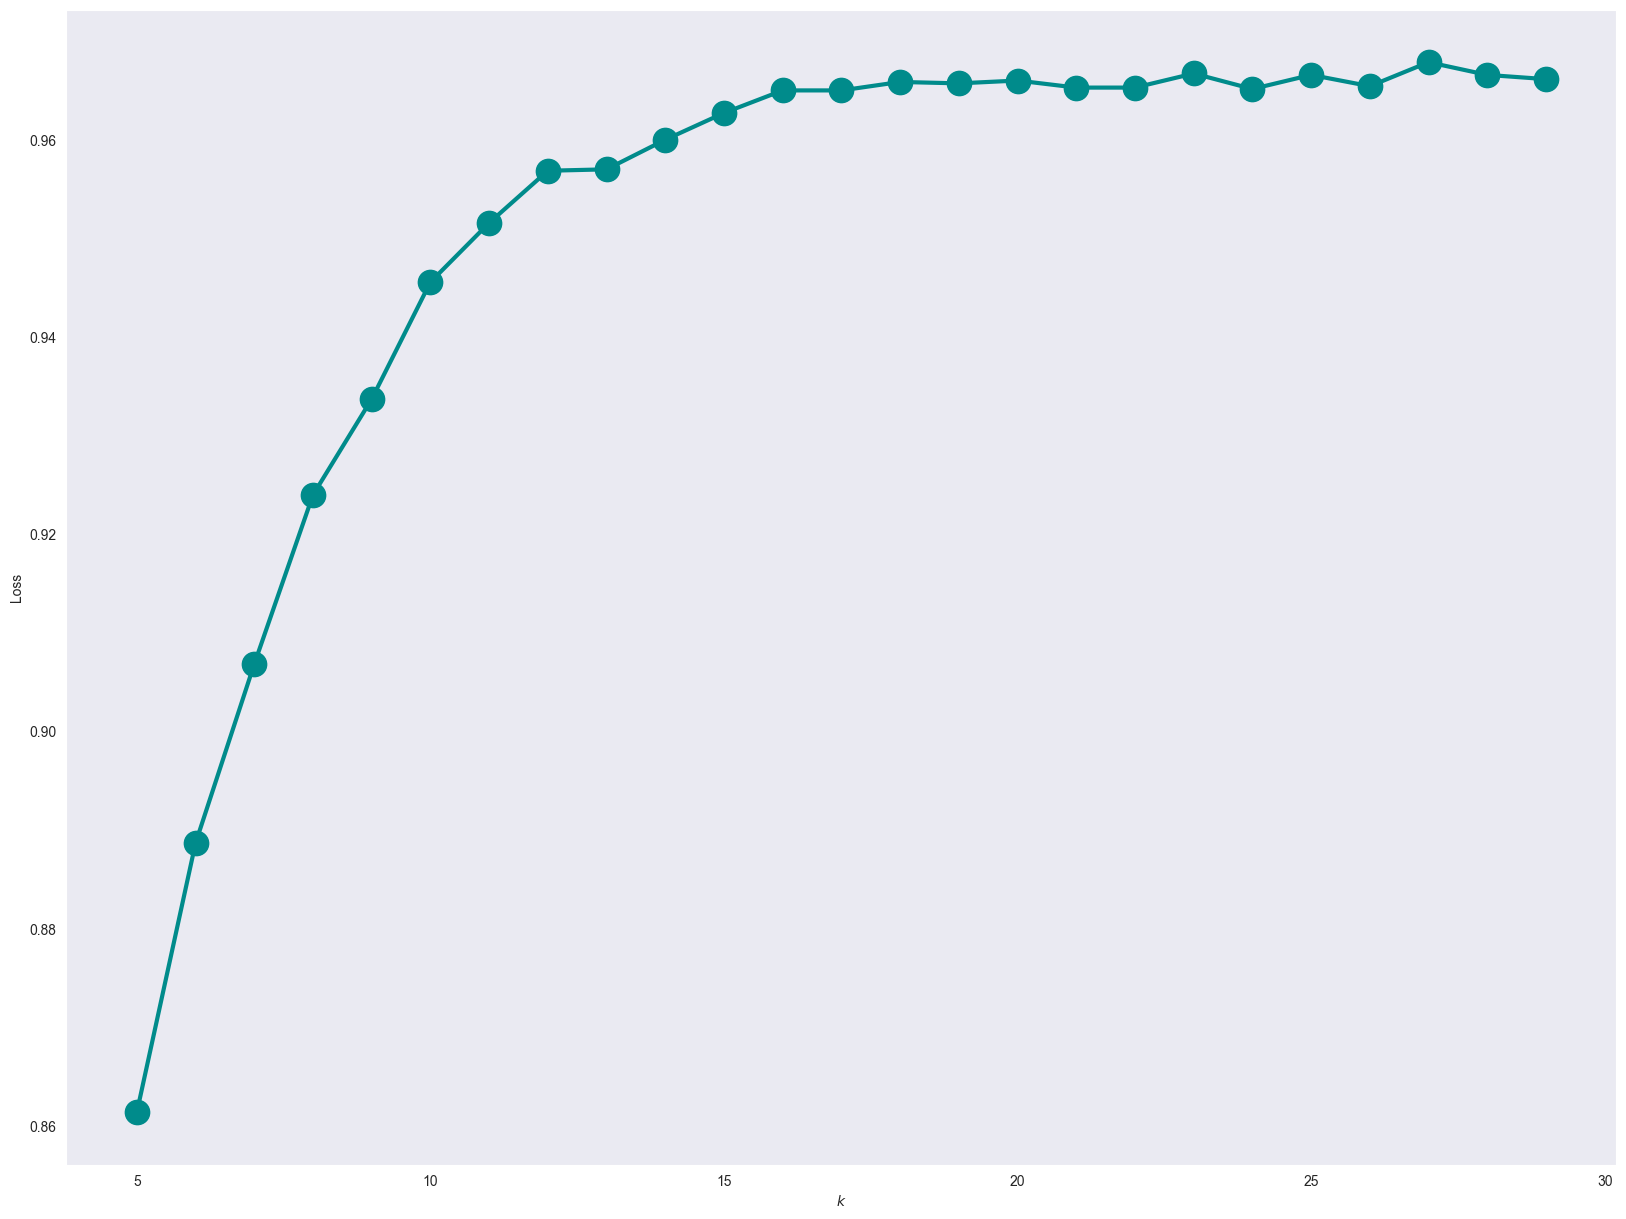

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

_x = list(depth_loss.keys())
_y = list(depth_loss.values())

plt.plot(
    _x, _y,
    linewidth=3, marker='.', markersize=35,
    color='darkcyan'
)

plt.xlabel(r'$k$')
plt.ylabel('Loss')

plt.grid()
plt.show()

27 - лучший результат

In [18]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth=27, random_state=42).fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)

**Бустинг над деревьями**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model_bust = GradientBoostingClassifier(random_state=42, n_estimators=3, max_depth=23, subsample=0.3).fit(X_train, y_train)
y_pred_bust = model_bust.predict(X_test)

**Пункт 2.1:** Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

Метрика accuracy не используется для линейных моделей. Поэтому она подойдёт только для логистичекой модели. Т к эта метрика не учитывает "непоподание" в ответ, поэтому она наиболее применима для бинарных классификаций.

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [20]:
%%time
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
predicted_logistic = lr.predict(X_test)

ridge = Ridge()
ridge.fit(X_train, y_train)
predicted_ridge = ridge.predict(X_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
predicted_lasso = lasso.predict(X_test)

CPU times: total: 2min 54s
Wall time: 43 s


In [21]:
predicted_ridge_2 = np.round(predicted_ridge, 0)
print(np.shape(predicted_ridge))
predicted_ridge_1 = ['q'] * len(predicted_ridge)
for i in range(len(predicted_ridge)):
    # print(i)
    a = str(predicted_ridge[i])
    # print(a)
    predicted_ridge_1[i] = str(predicted_ridge_2[i])
print(type(predicted_ridge_1[0]))

(7000,)
<class 'str'>


In [22]:
predicted_lasso_2 = np.round(predicted_lasso, 0)
print(np.shape(predicted_lasso))
predicted_lasso_1 = ['q'] * len(predicted_lasso)
for i in range(len(predicted_lasso)):
    # print(i)
    a = str(predicted_lasso[i])
    # print(a)
    predicted_lasso_1[i] = str(predicted_lasso_2[i])
print(type(predicted_lasso_1[0]))

(7000,)
<class 'str'>


In [23]:
accuracy_logistic = accuracy_score(y_test, predicted_logistic)

print(accuracy_logistic)

0.9195714285714286


In [24]:
accuracy_ridge = accuracy_score(y_test, predicted_ridge_1)
print(accuracy_ridge)

0.0


In [25]:
accuracy_lasso = accuracy_score(y_test, predicted_lasso_1)
print(accuracy_lasso)

0.0


Как видно, метрике для ридж и лассо очень плохо

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_logistic)
conf_matrix

array([[660,   0,   2,   0,   1,   8,   6,   2,   4,   0],
       [  0, 781,   3,   5,   1,   3,   0,   2,   4,   1],
       [  2,  12, 600,  12,   8,   2,  15,   6,  15,   2],
       [  1,   5,  18, 693,   1,  15,   2,   7,  10,   8],
       [  1,   0,   5,   1, 564,   3,   6,   3,   5,  23],
       [  4,   4,   5,  30,   7, 562,   8,   1,  29,   8],
       [  6,   2,   7,   0,   9,   6, 643,   2,   2,   0],
       [  0,   1,  17,   1,   6,   1,   0, 678,   2,  18],
       [  7,  11,   8,  23,   3,  19,   6,   5, 602,   9],
       [  3,   6,   2,   7,  16,   3,   0,  20,   9, 654]], dtype=int64)

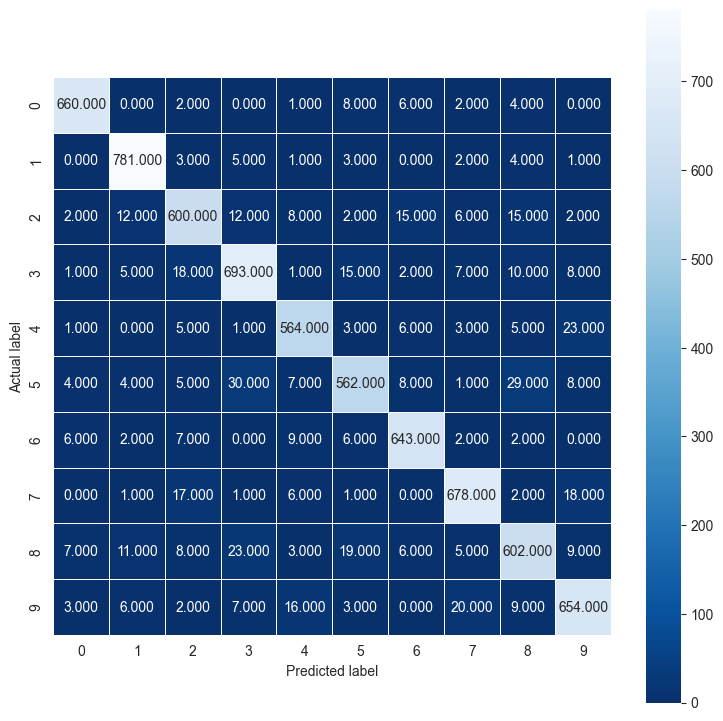

In [27]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

# Понижаем размерность

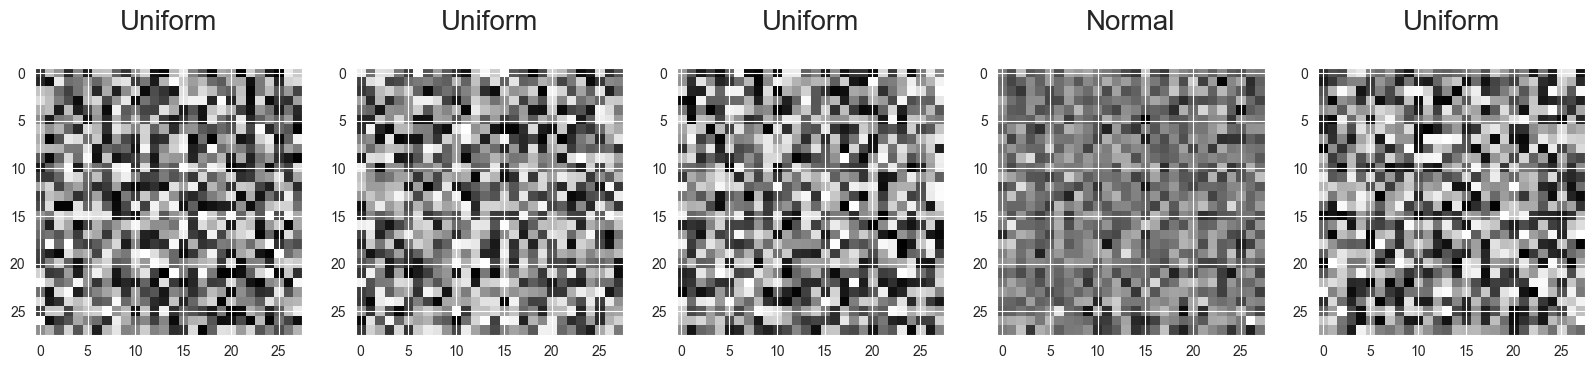

In [28]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [29]:
from sklearn.manifold import TSNE
tsne_representation = TSNE().fit_transform(X_train[:2000])

In [30]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train.values[:2000]

<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

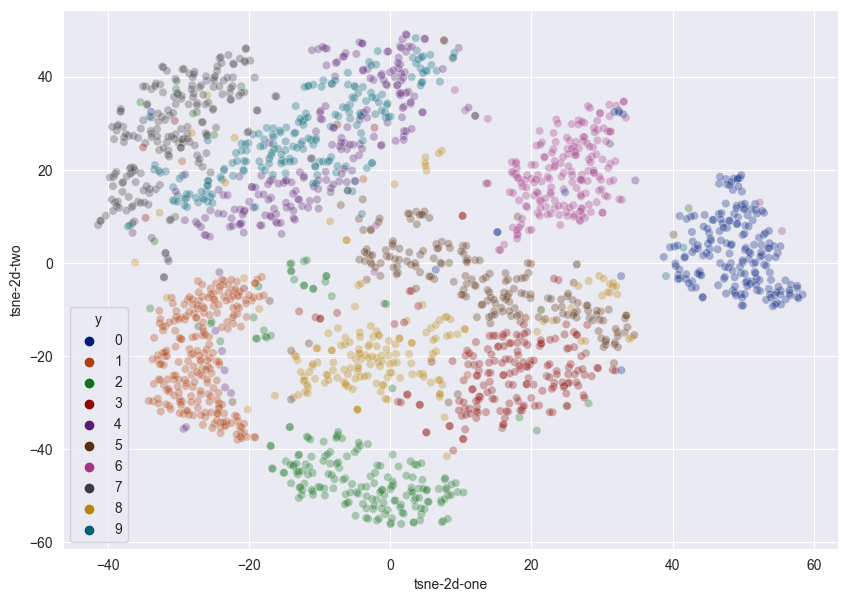

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [32]:
from sklearn.decomposition import #дополните здесь
pca_representation = #ваш код здесь

<AxesSubplot: xlabel='pca-2d-one', ylabel='pca-2d-two'>

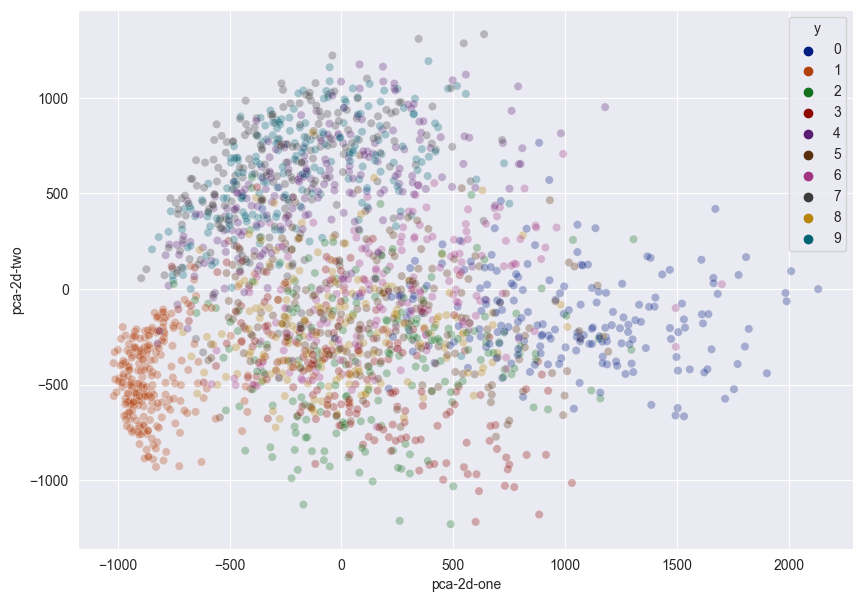

In [33]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [34]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,34.200226,-16.008348,8
1,-29.439217,41.544121,7
2,13.825556,30.949404,6
3,13.795077,-5.838568,5
4,-20.719778,11.018877,4


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [35]:
from sklearn.cluster import #ваш код здесь и далее

dbscan_repr = #предсказания меток dbscanом

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

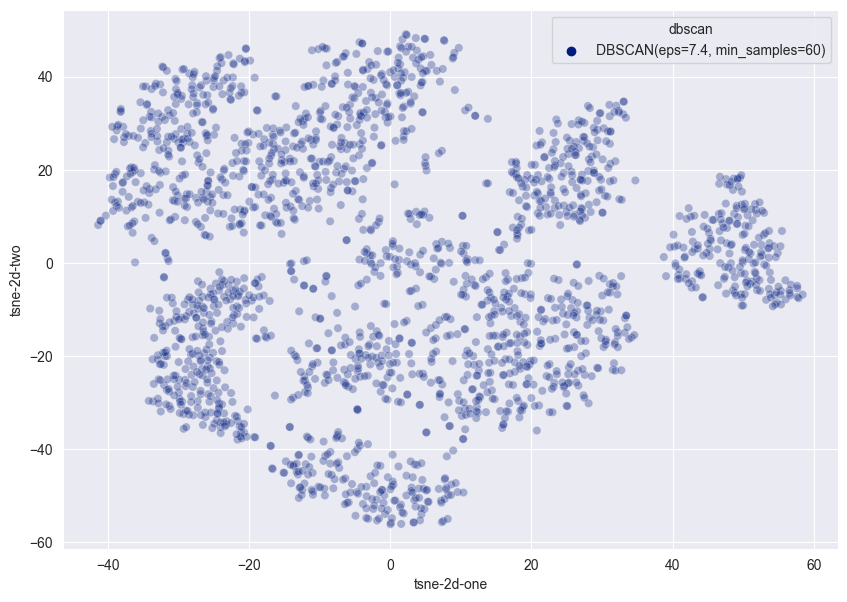

In [36]:
tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [37]:
#ваш код, графики и выводы здесь

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [38]:
#ваш код здесь

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [ ]:
#ваш код здесь